In [1]:
conda install -c anaconda git

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/n6/_zwm378d4qsdyyjp298n39_h0000gn/T/pip-req-build-o7c9dmwu
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/n6/_zwm378d4qsdyyjp298n39_h0000gn/T/pip-req-build-o7c9dmwu
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Text search
tweet_count = 10000
text_query = "#gme"
since_date = "2021-01-25"
until_date = "2021-02-14"

# Using OS library to call CLI commands in Python
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))

0

In [5]:
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df2 = pd.read_json('text-query-tweets.json', lines=True)

# Displays first 5 entries from dataframe
tweets_df2.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073839...,2021-02-13 23:51:28+00:00,#wallstreetbets That's the way fellows! I'm se...,#wallstreetbets That's the way fellows! I'm se...,1360738393500639243,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,None,NaN,None,NaN,None,None,None,None,"[wallstreetbets, gme, amc, protestbucks]",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073723...,2021-02-13 23:46:52+00:00,@SteHaller Way to get that info to the ppl. Wa...,@SteHaller Way to get that info to the ppl. Wa...,1360737235948216326,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,1.360729e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[wallstreetbets, protestbucks, gme, amc, nomul...",None
2,snscrape.modules.twitter.Tweet,https://twitter.com/Beburga/status/13607365523...,2021-02-13 23:44:09+00:00,Real #gme DD - like the full compilation Brock...,Real #gme DD - like the full compilation Brock...,1360736552318558208,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,...,None,NaN,None,NaN,None,None,None,None,[gme],None
3,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073544...,2021-02-13 23:39:46+00:00,@SmartyStocks #wallstreetbets Make no mistake ...,@SmartyStocks #wallstreetbets Make no mistake ...,1360735447467589634,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.360733e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,"[wallstreetbets, nomulligan, nobailout, gme, amc]",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/NPizzi/status/136073529239...,2021-02-13 23:39:09+00:00,"Looking under the #gme , #amc , #wsb hashtags ...","Looking under the #gme , #amc , #wsb hashtags ...",1360735292391452673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,None,NaN,None,NaN,None,None,None,None,"[gme, amc, wsb]",None


In [6]:
# Export dataframe into a CSV
tweets_df2.to_csv('text-query-tweets.csv', sep=',', index=False)

In [7]:
!pip install spacy

In [8]:
import nltk as nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import math
import re
import spacy
import string
from sklearn.feature_extraction.text import CountVectorizer


In [9]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marycarolinekreps/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marycarolinekreps/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
cleanup = []

for word in tweets_df2['content']:
    cleanup.append(word)

In [11]:
i = 0
while i < len(cleanup):    
    cleanup[i] = cleanup[i][1:]
    i += 1 

In [12]:
def clean_sentence(x):
    if type(x) == np.float:
        return ''
    temp = x.lower()
    temp = re.sub(r"['][t]", ' not', temp)
    temp = re.sub(r"['][r][e]", ' are', temp)
    temp = re.sub(r"['][l][l]", ' will', temp)
    temp = re.sub(r"['][m]", ' am', temp)
    temp = re.sub("'", "", temp)    
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub(r"[^a-z]", ' ', temp)
    temp = re.sub(r'([r][t]|[g][t])', '', temp)
    temp = re.sub(r'([ ][n][ ]|[ ][ ][ ])', '', temp)
    return temp

In [13]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    return temp

In [14]:
cleaned_words = []
c = 0
while c < len(cleanup):
    cleaned_words.append(clean_tweet(cleanup[c]))
    c += 1

<ipython-input-13-eb51345ce2f1>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [15]:
cleaned_sentence = []
d = 0
while d < len(cleaned_words):
    cleaned_sentence.append(' '.join(cleaned_words[d]))
    cleaned_sentence[d] = text = re.sub(r'[x]\w*[0-9]([0-9]|\w*)', '', cleaned_sentence[d])
    cleaned_sentence[d] = re.sub(r'([r][t]|[g][t])', '', cleaned_sentence[d])
    cleaned_sentence[d] = re.sub(r'([ ][n][ ]|[ ][ ][ ])', '', cleaned_sentence[d])
    cleaned_sentence[d] = re.sub(r"[^a-z]", ' ', cleaned_sentence[d])
    d += 1

In [16]:
tweets_df2['cleaned_sentence'] = cleaned_sentence

In [17]:
#Check word counts
all_words = []
i = 0
j = 0

while i < len(cleaned_sentence):
    j = 0
    while j < len(cleaned_sentence[i].split()):
        all_words.append(cleaned_sentence[i].split()[j])
        j += 1
    i += 1

In [18]:
def to_word(x):
    return x.split()

tweets_df2['words'] = tweets_df2['cleaned_sentence'].map(to_word)
tweets_df2[:5]

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,cleaned_sentence,words
0,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073839...,2021-02-13 23:51:28+00:00,#wallstreetbets That's the way fellows! I'm se...,#wallstreetbets That's the way fellows! I'm se...,1360738393500639243,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,None,NaN,None,None,None,None,"[wallstreetbets, gme, amc, protestbucks]",None,wallstreetbets thats the way fellows im seeing...,"[wallstreetbets, thats, the, way, fellows, im,..."
1,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073723...,2021-02-13 23:46:52+00:00,@SteHaller Way to get that info to the ppl. Wa...,@SteHaller Way to get that info to the ppl. Wa...,1360737235948216326,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,1.360729e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[wallstreetbets, protestbucks, gme, amc, nomul...",None,stehaller way to get that info to the ppl way ...,"[stehaller, way, to, get, that, info, to, the,..."
2,snscrape.modules.twitter.Tweet,https://twitter.com/Beburga/status/13607365523...,2021-02-13 23:44:09+00:00,Real #gme DD - like the full compilation Brock...,Real #gme DD - like the full compilation Brock...,1360736552318558208,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,...,None,NaN,None,None,None,None,[gme],None,eal dd like the full compilation brockhaus style,"[eal, dd, like, the, full, compilation, brockh..."
3,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073544...,2021-02-13 23:39:46+00:00,@SmartyStocks #wallstreetbets Make no mistake ...,@SmartyStocks #wallstreetbets Make no mistake ...,1360735447467589634,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,1.360733e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,"[wallstreetbets, nomulligan, nobailout, gme, amc]",None,smaystocks make no mistake any investigation w...,"[smaystocks, make, no, mistake, any, investiga..."
4,snscrape.modules.twitter.Tweet,https://twitter.com/NPizzi/status/136073529239...,2021-02-13 23:39:09+00:00,"Looking under the #gme , #amc , #wsb hashtags ...","Looking under the #gme , #amc , #wsb hashtags ...",1360735292391452673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,None,NaN,None,None,None,None,"[gme, amc, wsb]",None,ooking under the hashtags for hf bots and dunk...,"[ooking, under, the, hashtags, for, hf, bots, ..."


In [19]:
from nltk.stem.snowball import SnowballStemmer

In [20]:
s_stemmer = SnowballStemmer(language = 'english')
stem = []

for i in all_words:
    stem.append(s_stemmer.stem(i))

In [21]:
s_stemmer = SnowballStemmer(language = 'english')

def get_stem(x):
    x = lemmatize_stemming(x)
    x = x.split()
    stem = []
    stem2 = []
    i = 0
    j = 0
    while i < len(x):
        stem.append(s_stemmer.stem(x[i]))
        i += 1
    while j < len(stem):
        if stem[j] not in stopwords.words('english'):
            stem2.append(stem[j])
        j += 1
    return " ".join(stem2)

In [22]:
stem #Stemming

['wallstreetbet',
 'that',
 'the',
 'way',
 'fellow',
 'im',
 'see',
 'a',
 'big',
 'chang',
 'in',
 'the',
 'feed',
 'today',
 'keep',
 'tag',
 'rule',
 'breaker',
 'for',
 'other',
 'with',
 'the',
 'rule',
 'link',
 'and',
 'post',
 'your',
 'suppo',
 'and',
 'info',
 'for',
 'other',
 'we',
 'got',
 'the',
 'shos',
 'by',
 'the',
 'sho',
 'and',
 'cur',
 'now',
 'we',
 'pull',
 'togeth',
 'stehal',
 'way',
 'to',
 'get',
 'that',
 'info',
 'to',
 'the',
 'ppl',
 'way',
 'to',
 'help',
 'the',
 'movement',
 'and',
 'help',
 'your',
 'fellow',
 'hold',
 'the',
 'line',
 'by',
 'protect',
 'them',
 'from',
 'thigh',
 'to',
 'neck',
 'this',
 'is',
 'the',
 'spirit',
 'knowledg',
 'to',
 'the',
 'ppl',
 'i',
 'like',
 'theta',
 'gang',
 'on',
 'yt',
 'as',
 'well',
 'eal',
 'dd',
 'like',
 'the',
 'full',
 'compil',
 'brockhaus',
 'style',
 'smaystock',
 'make',
 'no',
 'mistak',
 'ani',
 'investig',
 'will',
 'end',
 'in',
 'an',
 'attempt',
 'at',
 'play',
 'their',
 'last',
 'and',


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marycarolinekreps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stem2 = []

for i in stem:
    if i not in stopwords.words('english'):
        stem2.append(i)

In [25]:
stem2

['wallstreetbet',
 'way',
 'fellow',
 'im',
 'see',
 'big',
 'chang',
 'feed',
 'today',
 'keep',
 'tag',
 'rule',
 'breaker',
 'rule',
 'link',
 'post',
 'suppo',
 'info',
 'got',
 'shos',
 'sho',
 'cur',
 'pull',
 'togeth',
 'stehal',
 'way',
 'get',
 'info',
 'ppl',
 'way',
 'help',
 'movement',
 'help',
 'fellow',
 'hold',
 'line',
 'protect',
 'thigh',
 'neck',
 'spirit',
 'knowledg',
 'ppl',
 'like',
 'theta',
 'gang',
 'yt',
 'well',
 'eal',
 'dd',
 'like',
 'full',
 'compil',
 'brockhaus',
 'style',
 'smaystock',
 'make',
 'mistak',
 'ani',
 'investig',
 'end',
 'attempt',
 'play',
 'last',
 'oldest',
 'card',
 'caus',
 'hedgefund',
 'go',
 'push',
 'regul',
 'let',
 'take',
 'sho',
 'bet',
 'tabl',
 'dont',
 'let',
 'ook',
 'hashtag',
 'hf',
 'bot',
 'dunk',
 'actual',
 'easier',
 'pro',
 'biden',
 'kamala',
 'bot',
 'dure',
 'dem',
 'primari',
 'somehow',
 'ws',
 'tech',
 'propaganda',
 'game',
 'lamer',
 'weaker',
 'dem',
 'pay',
 'one',
 'go',
 'figur',
 'aoc',
 'arent',
 '

In [26]:
def lemmatize_stemming(x):
    return s_stemmer.stem(WordNetLemmatizer().lemmatize(x, pos = 'v'))

In [27]:
def kind_check(x):
    x = x.split()
    if 'stock' in x:
        i = 0
        while i < len(x):
            if i != len(x) - 1:
                if x[i] == 'stock':
                    if (x[i + 1] != 'price' 
                        and x[i + 1] != 'prices'
                        and x[i + 1] != 'market'
                        and x[i + 1] != 'markets'
                        and x[i - 1] != 'gamestop'
                        and x[i - 1] != 'gme'
                        and x[i - 1] != 'my'
                        and x[i - 1] != 's'
                        and ('wall','street') not in x
                        and 'shares' not in x
                        and 'share' not in x
                        and 'overvalued' not in x):
                        x[i] = 'inventory'
                        i += 1
                    else:
                        i += 1
                else:
                    i += 1
            else:
                if (x[i] == 'stock'
                        and x[i - 1] != 'gamestop'
                        and x[i - 1] != 'gme'
                        and x[i - 1] != 'my'
                        and x[i - 1] != 's'
                        and ('wall','street') not in x
                        and 'shares' not in x
                        and 'share' not in x
                        and 'overvalued' not in x):
                    x[i] = 'inventory'
                    i += 1
                else:
                    i += 1
            
    return ' '.join(x)

In [28]:
def cosine_similarity_calc(vector_1,vector_2):

    similarity = np.dot(vector_1,vector_2)/(np.linalg.norm(vector_1)*np.linalg.norm(vector_2))

    return similarity

In [29]:
def get_similarity_value(df_in): 
    count_vec = CountVectorizer()
    dtm = count_vec.fit_transform(df_in['stem_text']).toarray() #column name represents the stemmed sentence column.
    similarity_df = pd.DataFrame(cosine_similarity(dtm)).reset_index()
    
    return similarity_df[0]

In [30]:
df_words = pd.DataFrame(stem2)
df_words = df_words[0].value_counts()

In [31]:
def get_sentence(x):
    if 1 in x:
        return 


tweets_df2['cleaned_sentence']

0       wallstreetbets thats the way fellows im seeing...
1       stehaller way to get that info to the ppl way ...
2        eal dd like the full compilation brockhaus style
3       smaystocks make no mistake any investigation w...
4       ooking under the hashtags for hf bots and dunk...
                              ...                        
9995    put about as much money into as i did for the ...
9996    raditional finance trying to show that it can ...
9997                                             elonmusk
9998    se volver a repetir un ahora con tlry segun   ...
9999    o ratpac enteainment bought the wrong story th...
Name: cleaned_sentence, Length: 10000, dtype: object

In [32]:
def get_words(x):
    return str(x).split()

In [33]:
def get_vc(x):
    return vc[x];

In [34]:
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for word in df_words:
    freqdoctor[word] += 1

freqdoctor

FreqDist({1: 6141, 2: 1317, 3: 683, 4: 385, 5: 278, 6: 225, 7: 175, 8: 144, 9: 116, 10: 87, ...})

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


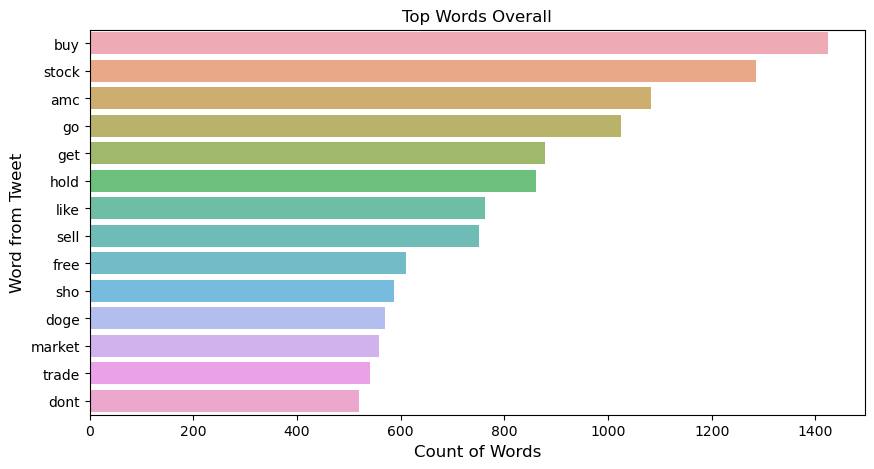

In [62]:
bob = df_words[1:15,]
plt.figure(figsize=(10,5))
sns.barplot(bob.values, bob.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [37]:
import spacy
from spacy.cli.download import download
download(model="en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [38]:
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [39]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [40]:
str1 = " " 
stem2 = str1.join(stem2)
stem2 = nlp(stem2)
len(stem2)

103655

In [41]:
len(stem2.ents)

4995

In [42]:
label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df6

,Word,Entity
0,chang,PERSON
1,today,DATE
2,one,CARDINAL
3,negat,ORG
4,second,ORDINAL
...,...,...
4990,last hour,TIME
4991,last year,DATE
4992,lesson mani peopl elonmusk,PERSON
4993,un ahora,ORG


In [43]:
df7 = df6['Entity'].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


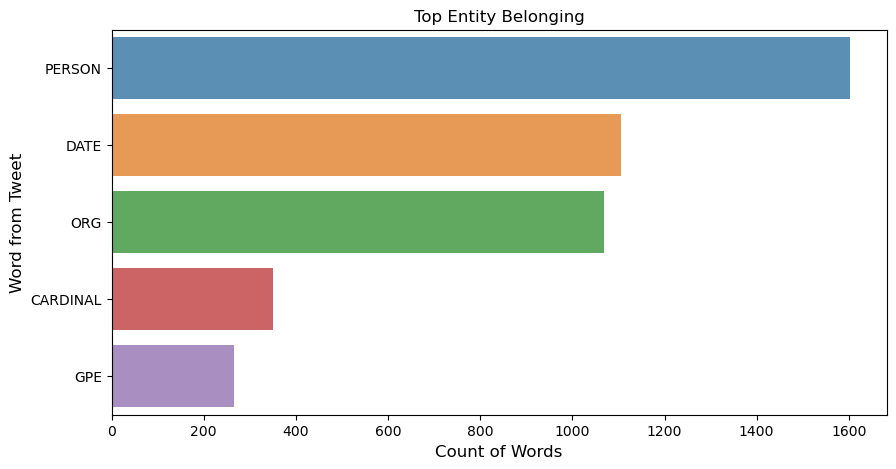

In [44]:
dfk = df7[:5,]
plt.figure(figsize=(10,5))
sns.barplot(dfk.values, dfk.index, alpha=0.8)
plt.title('Top Entity Belonging')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [45]:
tweets_df2[:5]

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,cleaned_sentence,words
0,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073839...,2021-02-13 23:51:28+00:00,#wallstreetbets That's the way fellows! I'm se...,#wallstreetbets That's the way fellows! I'm se...,1360738393500639243,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,None,NaN,None,None,None,None,"[wallstreetbets, gme, amc, protestbucks]",None,wallstreetbets thats the way fellows im seeing...,"[wallstreetbets, thats, the, way, fellows, im,..."
1,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073723...,2021-02-13 23:46:52+00:00,@SteHaller Way to get that info to the ppl. Wa...,@SteHaller Way to get that info to the ppl. Wa...,1360737235948216326,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,1.360729e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[wallstreetbets, protestbucks, gme, amc, nomul...",None,stehaller way to get that info to the ppl way ...,"[stehaller, way, to, get, that, info, to, the,..."
2,snscrape.modules.twitter.Tweet,https://twitter.com/Beburga/status/13607365523...,2021-02-13 23:44:09+00:00,Real #gme DD - like the full compilation Brock...,Real #gme DD - like the full compilation Brock...,1360736552318558208,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,...,None,NaN,None,None,None,None,[gme],None,eal dd like the full compilation brockhaus style,"[eal, dd, like, the, full, compilation, brockh..."
3,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073544...,2021-02-13 23:39:46+00:00,@SmartyStocks #wallstreetbets Make no mistake ...,@SmartyStocks #wallstreetbets Make no mistake ...,1360735447467589634,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,1.360733e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,"[wallstreetbets, nomulligan, nobailout, gme, amc]",None,smaystocks make no mistake any investigation w...,"[smaystocks, make, no, mistake, any, investiga..."
4,snscrape.modules.twitter.Tweet,https://twitter.com/NPizzi/status/136073529239...,2021-02-13 23:39:09+00:00,"Looking under the #gme , #amc , #wsb hashtags ...","Looking under the #gme , #amc , #wsb hashtags ...",1360735292391452673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,None,NaN,None,None,None,None,"[gme, amc, wsb]",None,ooking under the hashtags for hf bots and dunk...,"[ooking, under, the, hashtags, for, hf, bots, ..."


##January Data

In [46]:
df1 = tweets_df2
len(df1)
df1[:5]

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,cleaned_sentence,words
0,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073839...,2021-02-13 23:51:28+00:00,#wallstreetbets That's the way fellows! I'm se...,#wallstreetbets That's the way fellows! I'm se...,1360738393500639243,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,None,NaN,None,None,None,None,"[wallstreetbets, gme, amc, protestbucks]",None,wallstreetbets thats the way fellows im seeing...,"[wallstreetbets, thats, the, way, fellows, im,..."
1,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073723...,2021-02-13 23:46:52+00:00,@SteHaller Way to get that info to the ppl. Wa...,@SteHaller Way to get that info to the ppl. Wa...,1360737235948216326,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,1.360729e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[wallstreetbets, protestbucks, gme, amc, nomul...",None,stehaller way to get that info to the ppl way ...,"[stehaller, way, to, get, that, info, to, the,..."
2,snscrape.modules.twitter.Tweet,https://twitter.com/Beburga/status/13607365523...,2021-02-13 23:44:09+00:00,Real #gme DD - like the full compilation Brock...,Real #gme DD - like the full compilation Brock...,1360736552318558208,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,...,None,NaN,None,None,None,None,[gme],None,eal dd like the full compilation brockhaus style,"[eal, dd, like, the, full, compilation, brockh..."
3,snscrape.modules.twitter.Tweet,https://twitter.com/cabjacoda/status/136073544...,2021-02-13 23:39:46+00:00,@SmartyStocks #wallstreetbets Make no mistake ...,@SmartyStocks #wallstreetbets Make no mistake ...,1360735447467589634,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,1.360733e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,"[wallstreetbets, nomulligan, nobailout, gme, amc]",None,smaystocks make no mistake any investigation w...,"[smaystocks, make, no, mistake, any, investiga..."
4,snscrape.modules.twitter.Tweet,https://twitter.com/NPizzi/status/136073529239...,2021-02-13 23:39:09+00:00,"Looking under the #gme , #amc , #wsb hashtags ...","Looking under the #gme , #amc , #wsb hashtags ...",1360735292391452673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,None,NaN,None,None,None,None,"[gme, amc, wsb]",None,ooking under the hashtags for hf bots and dunk...,"[ooking, under, the, hashtags, for, hf, bots, ..."


In [47]:
len(df1)

10000

In [48]:
df1['cleaned_sentence'] = df1['cleaned_sentence'].map(clean_sentence)
df1['cleaned_sentence'] = df1['cleaned_sentence'].map(kind_check)

<ipython-input-12-217839139fc9>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(x) == np.float:


In [49]:
df1_1 = df1.copy()
df1_1['words'] = df1_1['cleaned_sentence'].map(get_words)
df1_2 = df1_1[['cleaned_sentence', 'words']]
df1_2['phase'] = 'Jan'

<ipython-input-49-ff9dde2bc92c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2['phase'] = 'Jan'


In [50]:
df1_2['stem_text'] = df1_2['cleaned_sentence'].map(get_stem)

<ipython-input-50-b8b1e4bedca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2['stem_text'] = df1_2['cleaned_sentence'].map(get_stem)


In [51]:
df1_2[:5]

,cleaned_sentence,words,phase,stem_text
0,wallstreetbets thats the way fellows im seeing...,"[wallstreetbets, thats, the, way, fellows, im,...",Jan,wallstreetbet way fellow im see big chang feed...
1,stehaller way to get that info to the ppl way ...,"[stehaller, way, to, get, that, info, to, the,...",Jan,stehal way get info ppl way help movement help...
2,eal dd like the full compilation brockhaus style,"[eal, dd, like, the, full, compilation, brockh...",Jan,eal dd like full compil brockhaus styl
3,smaystocks make no mistake any investigation w...,"[smaystocks, make, no, mistake, any, investiga...",Jan,smaystock make mistak ani investig end attempt...
4,ooking under the hashtags for hf bots and dunk...,"[ooking, under, the, hashtags, for, hf, bots, ...",Jan,ook hashtag hf bot dunk actual easier pro bide...


In [52]:
st = 'Instead of saying the Gamestop stock is being overvalued, Kiko believes that the GME stock price will keep rising in the future.'
st = clean_sentence(st)
st = kind_check(st)
st = get_stem(st)
print(st)

instead say gamestop stock overvalu kiko believ gme stock price keep rise futur


<ipython-input-12-217839139fc9>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(x) == np.float:


In [53]:
df1_3 = df1_2.copy()
df1_3.loc[-1] = ['','','Jan',get_stem(st)]
df1_3.index = df1_3.index + 1
df1_3 = df1_3.sort_index()

In [54]:
df1_3['score'] = get_similarity_value(df1_3)

In [55]:
df1_3


,cleaned_sentence,words,phase,stem_text,score
0,,,Jan,instead say gamestop stock overvalu kiko belie...,1.000000
1,wallstreetbets thats the way fellows im seeing...,"[wallstreetbets, thats, the, way, fellows, im,...",Jan,wallstreetbet way fellow im see big chang feed...,0.050637
2,stehaller way to get that info to the ppl way ...,"[stehaller, way, to, get, that, info, to, the,...",Jan,stehal way get info ppl way help movement help...,0.000000
3,eal dd like the full compilation brockhaus style,"[eal, dd, like, the, full, compilation, brockh...",Jan,eal dd like full compil brockhaus styl,0.000000
4,smaystocks make no mistake any investigation w...,"[smaystocks, make, no, mistake, any, investiga...",Jan,smaystock make mistak ani investig end attempt...,0.000000
...,...,...,...,...,...
9996,put about as much money into as i did for the ...,"[put, about, as, much, money, into, as, i, did...",Jan,put much money berni campaign last year reason...,0.000000
9997,raditional finance trying to show that it can ...,"[raditional, finance, trying, to, show, that, ...",Jan,radit financ tri show keep crypto sure doubl d...,0.066667
9998,elonmusk,[elonmusk],Jan,elonmusk,0.000000
9999,se volver a repetir un ahora con tlry segun ay...,"[se, volver, a, repetir, un, ahora, con, tlry,...",Jan,se volver repetir un ahora con tlri segun ayer...,0.000000


In [56]:
df1_3['score'][:10]

0    1.000000
1    0.050637
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.115470
7    0.097590
8    0.000000
9    0.000000
Name: score, dtype: float64

In [57]:
df1_3['score'].mean()

0.038950069577342074